In [1]:
#On lit les données sauvegardées
import numpy as np
import pickle
tabDonnees = np.load("baseDonneesTableau.npy",allow_pickle=True)

In [2]:
print(tabDonnees.shape)

(102592, 7201)


In [3]:
#On crée deux tableaux pour séparer les images des diagnostics
tabImg=tabDonnees[:,:7200]
tabDiag=tabDonnees[:,7200]
print(tabImg.shape)
print(tabImg[1])
print(tabDiag.shape)
print(tabDiag[1])

(102592, 7200)
[0.85882354 0.58823532 0.77254903 ... 0.97647059 0.95294118 0.98039216]
(102592,)
0.0


In [5]:
#On compte le nombre d'images négatives et positives.
nbPos=0
for i in range (102592) :
    if tabDiag[i]==1 :
        nbPos=nbPos+1
        
print(nbPos)
nbNeg=len(tabDiag)-nbPos
print(nbNeg)

24504
78088


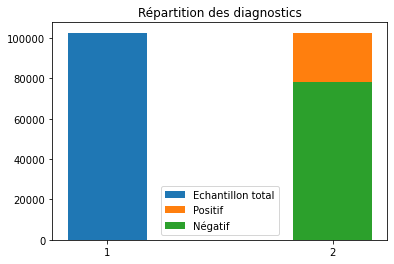

In [6]:
#On trace un diagramme en barres pour visualiser la répartition des diagnostiques
from matplotlib import pyplot as plt
ind=range(1,3)

bar1=len(tabDonnees)
bar2=nbNeg
bar3=nbPos

p1=plt.bar(1,bar1,0.35)
p2=plt.bar(2,bar3,0.35,bottom=bar2)
p3=plt.bar(2,bar2,0.35)


plt.title("Répartition des diagnostics")
plt.xticks(ind,('1','2'))
plt.legend((p1[0],p2[0],p3[0]),('Echantillon total','Positif','Négatif'))

([<matplotlib.patches.Wedge at 0x1b265012b20>,
 [Text(0.8045830080723443, 0.7500974490832895, 'Images Positives'),
  Text(-0.8045830431869395, -0.7500974114180394, 'Images Négatives')])

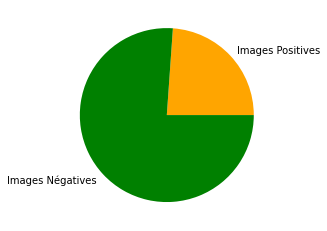

In [16]:
#On trace ensuite le même diagramme mais sous forme d'un camembert
sizes=[nbPos,nbNeg]
labels=["Images Positives","Images Négatives"]
colors=["orange","green"]
plt.pie(sizes, labels=labels, colors=colors)

In [7]:
#On sépare les données en deux jeux, un pour l'entraînement et un pour les tests
import sklearn as sk
from sklearn.model_selection import train_test_split


Xtrain,Xtest,ytrain,ytest = train_test_split(tabImg,tabDiag,test_size=0.25,random_state=0)

In [8]:
print(np.shape(Xtrain))
print(np.shape(ytrain))
print(np.shape(Xtest))
print(np.shape(ytest))

(76944, 7200)
(76944,)
(25648, 7200)
(25648,)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [ ]:
#On commence par la méthode des plus proches voisins

KNN = KNeighborsClassifier()
clf = KNN.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

In [9]:
#Méthode par arbre de décision

Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)
clf = Arbre_decision.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

0.8055988771054273

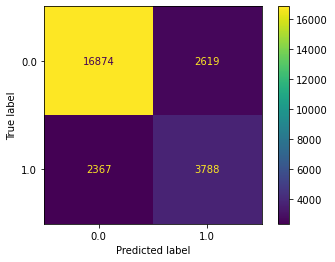

In [16]:
#matrice de confusion
plot_confusion_matrix(clf,Xtest,ytest)
plt.show()

In [9]:
#Méthode SVM

clf = svm.SVC(gamma=0.001)
clf.fit(Xtrain,ytrain)
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

0.8637710542732376